In [23]:
import numpy as np
from matplotlib import pyplot as plt

# Test how it scales with the lenght of the lattice N the computational time
As N is the lenght of the box, the number of cells is $N^2$, so the FFT will have a cost
$$\sim N^2\log N$$

Here we check if $\sim N^2$ is the way the time scales

RUN: "simulate/performance_gendata.ipynb"

In [24]:
Ns = np.array([64,128,256,512,1024,2048,4096])
std = np.ones(len(Ns))*(-1)
std_saves = np.ones(len(Ns))*(-1)
ts = np.ones(len(Ns))*(-1)
ts_save = np.ones(len(Ns))*(-1)

numsteps = 100
time_file = "../simulate/computational_times/numsteps="+str(numsteps)
savetime_file = "../simulate/save_computational_times/numsteps="+str(numsteps)

j = 0
for N in Ns:
    # Compute average
    f = open(time_file+"/"+str(N)+".dat", "r")
    fsave = open(savetime_file+"/"+str(N)+".dat", "r")
    sum = 0
    sum_saves = 0
    i = 0
    for row in f:
        sum = sum + float(row)
        i = i + 1
    for row in fsave:
        sum_saves = sum_saves + float(row)
    
    ts[j] = (sum-sum_saves)/i
    ts_save[j] = sum_saves/i
    f.close()
    fsave.close()

    # Compute std
    ys = np.zeros(i)
    f = open(time_file+"/"+str(N)+".dat", "r")
    fsave = open(savetime_file+"/"+str(N)+".dat", "r")
    sum = 0
    sum_saves = 0
    i = 0
    for row in f:
        ys[i] = float(row)
        i = i + 1
    i = 0
    for row in fsave:
        ys[i] = ys[i]-float(row)
        sum_saves = sum_saves + (float(row)-ts_save[j])**2
        sum = sum + (ys[i]-ts[j])**2
        i = i + 1
    std[j] = np.sqrt(sum/i)/np.sqrt(i)
    std_saves[j] = np.sqrt(sum_saves/i)/np.sqrt(i)
    
    j = j + 1

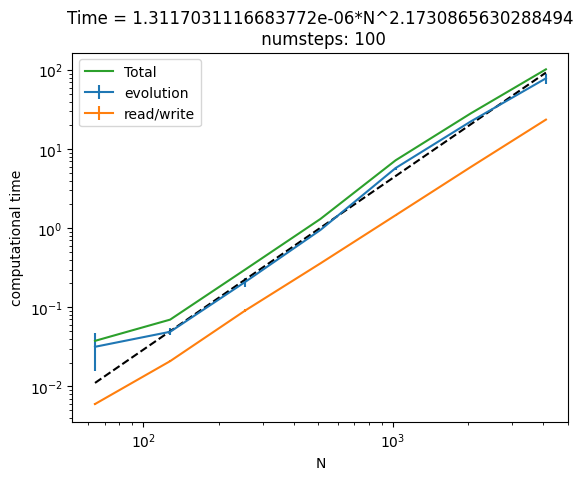

In [25]:
fig, ax = plt.subplots()
ax.errorbar(Ns, ts, yerr=std, label="evolution")
ax.errorbar(Ns, ts_save, yerr=std_saves, label="read/write")
ax.plot(Ns, ts+ts_save, label="Total")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("N")
ax.set_ylabel("computational time")
# Fit
imin = 1
logNs = np.log(Ns[imin:len(Ns)])
logts = np.log(ts[imin:len(Ns)])
c = np.polyfit(logNs, logts, deg=1)
fitx = np.linspace(min(Ns),max(Ns),1000)
ax.plot(fitx, np.exp(c[1])*np.power(fitx,c[0]),'--',color="black")

ttitle = "Time = "+str(np.exp(c[1]))+"*N^"+str(c[0])
ax.set_title(ttitle+"\n numsteps: "+str(numsteps))
ax.legend()